<a href="https://colab.research.google.com/github/matzewolf/my-colab-notebooks/blob/master/test_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and preprocess data

Datasets:

- fer2013

First, some preparations for the notebook: Import libraries and connect to Google Drive.

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Upload dataset into Colab
from google.colab import files

# Connect Colab with Google Drive to save output files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Define some constants:

In [0]:
# Paths
DATA_PATH    = "/content/drive/My Drive/Colab Notebooks/bsc_fer_cnn/data"
FER2013_PATH = "/content/drive/My Drive/Colab Notebooks/bsc_fer_cnn/fer2013.csv"

# Constants for FER2013 dataset
FER2013_WIDTH = 48
FER2013_HEIGHT = 48

To read the dataset into a Pandas dataframe, select a csv file from your local filesystem:

In [0]:
data = pd.read_csv(FER2013_PATH)
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [0]:
data["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [0]:
# Seperate training and public/private test data
data_publ_test = data[data.Usage=="PublicTest"]
data_priv_test = data[data.Usage=="PrivateTest"]
data = data[data.Usage=="Training"]

In [0]:
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]  # indices 0 to 6

In [0]:
data["emotion"].value_counts(sort=False)

0    3995
1     436
2    4097
3    7215
4    4830
5    3171
6    4965
Name: emotion, dtype: int64

In [0]:
def fer2013_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(data.at[index, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
    print(Emotions[data.at[index, "emotion"]])
    plt.imshow(image, cmap="gray")

Neutral


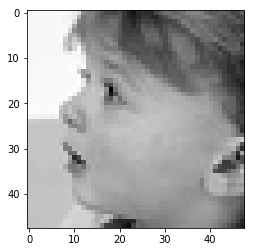

In [0]:
fer2013_show_instance(np.random.randint(0,len(data)))

In [0]:
def fer2013_to_X(dataset=data):
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = dataset["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    return X

In [0]:
# Get features (image data)
X = fer2013_to_X()
X.shape

(28709, 48, 48, 1)

Now let's get the labels, which is the emotion category encoded in integers $\in [0,6]$.

**Caution:** Keras' `sparse_categorical_crossentropy` loss does not work with one-hot-encoded data, which is why we leave the integer representation as is.

See also: https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy

In [0]:
# Get labels (NOT one-hot encoded!)
y = data['emotion'].values
y.shape

(28709,)

In [0]:
# Get test features (image data)
X_test = fer2013_to_X(dataset=data_publ_test)
X_test.shape

(3589, 48, 48, 1)

In [0]:
# Get test labels (NOT one-hot encoded!)
y_test = data_publ_test['emotion'].values
y_test.shape

(3589,)

In [0]:
# Save data
np.save(os.path.join(DATA_PATH, "fer2013_X")     , X)
np.save(os.path.join(DATA_PATH, "fer2013_y")     , y)
np.save(os.path.join(DATA_PATH, "fer2013_X_test"), X_test)
np.save(os.path.join(DATA_PATH, "fer2013_y_test"), y_test)